У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
df = pd.read_csv('../data/yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

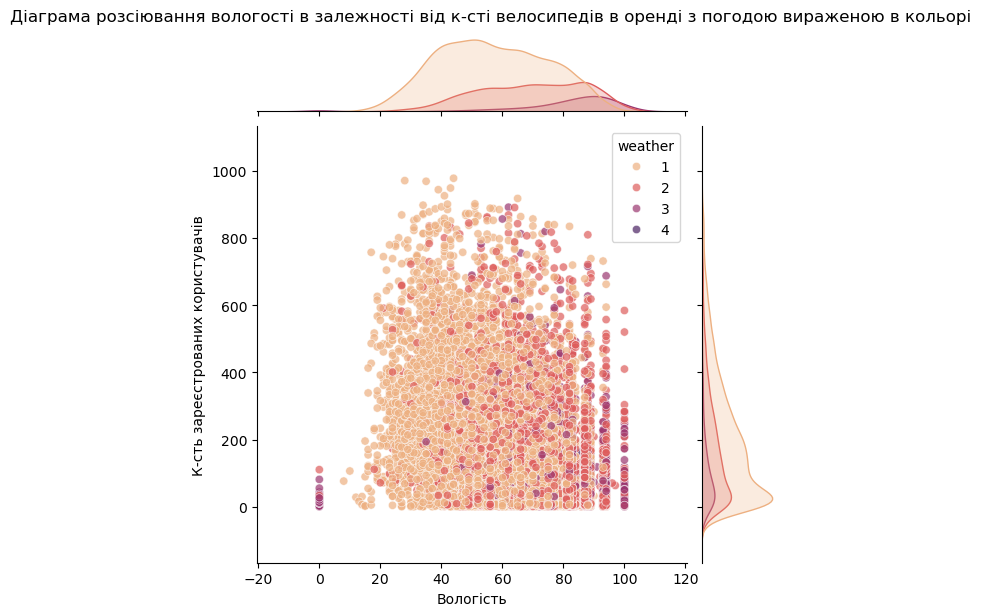

In [46]:
sns.jointplot(data=df, x='humidity', y='count', hue='weather', palette='flare', alpha=0.7)
plt.suptitle('Графік розсіювання вологості в залежності від к-сті велосипедів в оренді з погодою вираженою в кольорі', y=1.02)
plt.xlabel('Вологість')
plt.ylabel('К-сть зареєстрованих користувачів')
plt.show()

З графіка бачимо, що найчастіше користувались електровелосипедами в ясну погоду (weather 1), менше в хмарну/туманну (weather 2) і майже не користувались в сильний дощ/сніг/грозу (weather 4). Щодо вологості - найкомфортніші значення для поїздок лежать в діапазоні 20-60 %вологості (бачимо це по кількості користувачів). Можемо зробити висновок, що такий вид транспорту користується попитом в певних погодніх умовах (низька-середня вологість) і ясна/хмарна погода без опадів. Для підняття попиту в погоду з опадами є хорошим варіантом обладнати велосипед із зонтом/навісом над сидінням, або введення спецпропозицій/знижок користувачам під час негоди для стимуляції попиту

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [28]:
df_filtered = df[df['season'].isin([1, 2])]

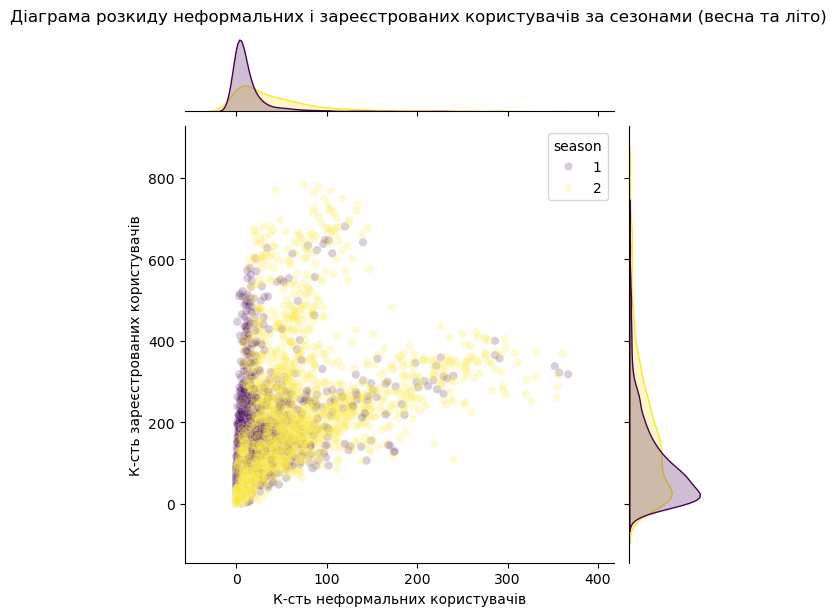

In [44]:
sns.jointplot(data=df_filtered, x='casual', y='registered', hue='season', palette='viridis', alpha=0.2)
plt.suptitle('Графік розсіювання неформальних і зареєстрованих користувачів за сезонами (весна та літо)', y=1.02)
plt.xlabel('К-сть неформальних користувачів')
plt.ylabel('К-сть зареєстрованих користувачів')
plt.show()

З графіка бачимо, що зареєстрованих користувачів, як і неформальних більше весною, ніж влітку. Також, можна зробити висновок, що зареєстрованих користувачів значно більше, ніж неформальних, а також те, що кількість неформальних користувачів трохи зросла з влітку. Можна запропонувати акції/промокоди/бонуси для залучення більше зареєстрованих користувачів у літній період

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


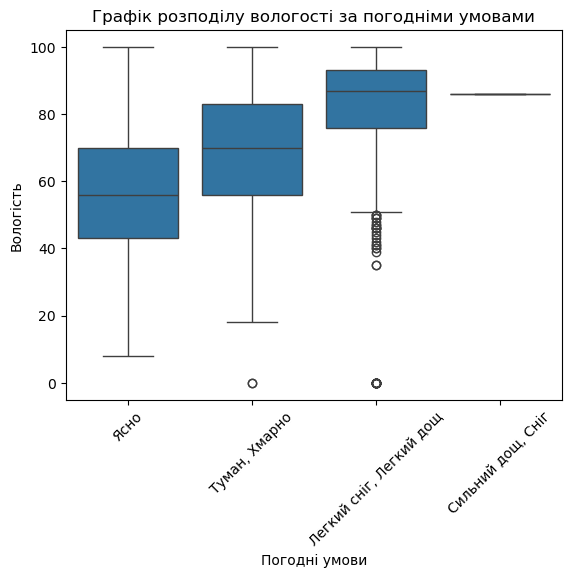

In [58]:
sns.boxplot(data=df, x='weather', y='humidity')
plt.title('Графік розподілу вологості за погодніми умовами')
plt.xlabel('Погодні умови')
plt.ylabel('Вологість')
plt.xticks(ticks=range(4), labels=['Ясно', 'Туман, Хмарно', 'Легкий сніг, Легкий дощ', 'Сильний дощ, Сніг'], rotation=45)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [127]:
df_filtered = df[['registered', 'casual', 'count', 'holiday', 'workingday']]

In [129]:
df_filtered = df_filtered.apply(lambda x: x.astype('category') if x.name in ['holiday', 'workingday'] else x)

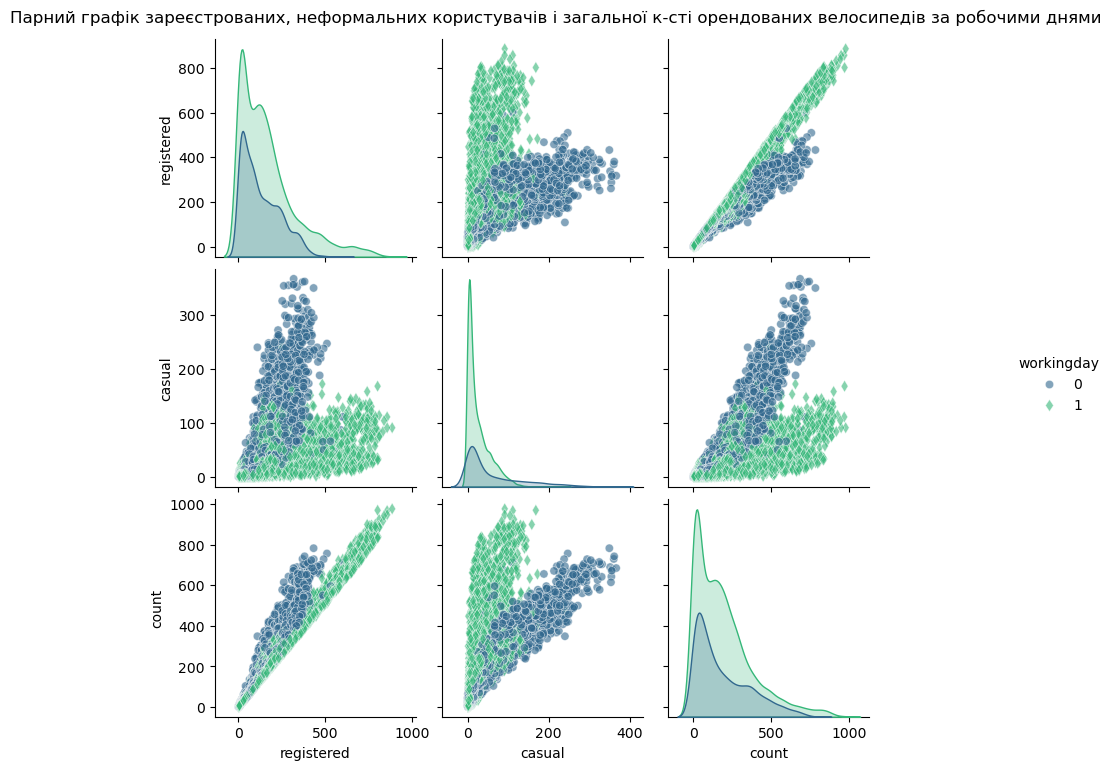

In [145]:
sns.pairplot(df_filtered, hue='workingday', palette='viridis', markers=["o", "d"], plot_kws={'alpha': 0.6})
plt.suptitle('Парний графік зареєстрованих, неформальних користувачів і загальної к-сті орендованих велосипедів за робочими днями', y=1.02)
plt.show()

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [117]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [119]:
df['date'] = df.datetime.dt.date

In [133]:
df_viz = df[['date', 'registered', 'casual']]
df_viz_grouped = df_viz.groupby('date').sum()

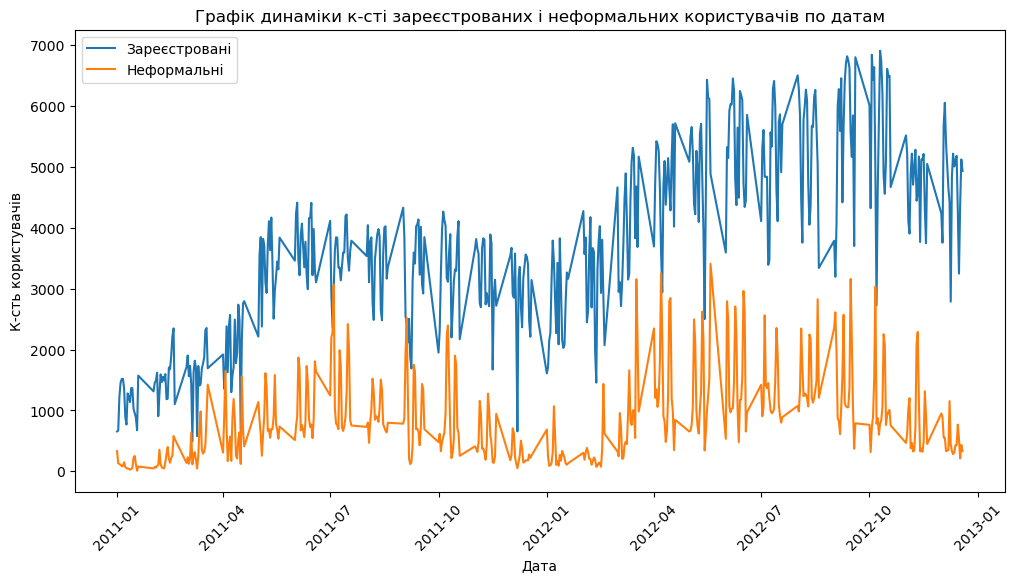

In [143]:
ax = df_viz_grouped.plot(figsize=(12, 6))
ax.set_title('Графік динаміки к-сті зареєстрованих і неформальних користувачів по датам')
ax.set_xlabel('Дата')
ax.set_ylabel('К-сть користувачів')
ax.legend(['Зареєстровані', 'Неформальні'])
plt.xticks(rotation=45)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
